In [119]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

Read the data

In [120]:
df = pd.read_csv('year_df.csv')

In [121]:
df.columns

Index(['Year', 'State', 'TAVG', 'TMIN', 'TMAX', 'Median_Income', 'Date',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'Astronomical Low Tide', 'Avalanche', 'Blizzard', 'Coastal Flood',
       'Cold/Wind Chill', 'Debris Flow', 'Dense Fog', 'Dense Smoke', 'Drought',
       'Dust Devil', 'Dust Storm', 'Excessive Heat', 'Extreme Cold/Wind Chill',
       'Flash Flood', 'Flood', 'Freezing Fog', 'Frost/Freeze', 'Funnel Cloud',
       'HAIL FLOODING', 'HAIL/ICY ROADS', 'Hail', 'Heat', 'Heavy Rain',
       'Heavy Snow', 'High Surf', 'High Wind', 'Hurricane',
       'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
       'Lakeshore Flood', 'Landslide', 'Lightning', 'Marine Dense Fog',
       'Marine Hail', 'Marine High Wind', 'Marine Hurricane/Typhoon',
       'Marine Lightning', 'Marine Strong Wind', 'Marine Thunderstorm Wind',
       'Marine Tropical Depression', 'Marine Tropical Storm', 'Rip Current'

Compute total_crimes column

In [122]:
df['total_crimes'] = df['violent_crime'] + df['homicide'] + df['rape_legacy'] + df['robbery'] + df['aggravated_assault'] + df['property_crime'] + df['burglary'] + df['larceny'] + df['motor_vehicle_theft']

Check for insignificant variables at the univariate level

In [123]:
for i in range(len(df.columns)):
    
    x = df.iloc[:, i]
    model = smf.glm(formula = "total_crimes ~ x", data=df, family=sm.families.NegativeBinomial()).fit()
    results = model.pvalues[1]
    
    if results >= 0.05:
        print(i)
        print(df.columns[i])
        print(results)
        print('\n')

6
Date
0.595057372387


13
Astronomical Low Tide
0.819757953718


16
Coastal Flood
0.680611857029


17
Cold/Wind Chill
0.456733789478


22
Dust Devil
0.166112619311


24
Excessive Heat
0.895326956054


27
Flood
0.801408288171


28
Freezing Fog
0.237078287885


31
HAIL FLOODING
0.440292213341


34
Heat
0.216050957784


35
Heavy Rain
0.903330366897


38
High Wind
0.261746131603


39
Hurricane
0.250952520422


41
Ice Storm
0.183422379868


44
Landslide
0.0766629824854




C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


56
Seiche
0.168564424985


57
Sleet
0.0618903677367


61
THUNDERSTORM WIND/ TREE
0.637416827457


62
THUNDERSTORM WIND/ TREES
0.637416827457


63
THUNDERSTORM WINDS FUNNEL CLOU
0.941588532998


64
THUNDERSTORM WINDS HEAVY RAIN
0.929712378329


65
THUNDERSTORM WINDS LIGHTNING
0.946128450458


66
THUNDERSTORM WINDS/ FLOOD
0.181978324645


67
THUNDERSTORM WINDS/FLASH FLOOD
0.440292213341


69
THUNDERSTORM WINDS/HEAVY RAIN
0.898734936366


70
TORNADO/WATERSPOUT
0.690660109087


73
Tropical Depression
0.20236595449


80
Winter Weather
0.866936873676


81
PHYSHLTH
0.149487916037


82
MENTHLTH
0.250833654033




Check for significant variables at the univariate level

In [124]:
columns_to_keep = []

for i in range(len(df.columns)):
    
    x = df.iloc[:, i]
    model = smf.glm(formula = "total_crimes ~ x", data=df, family=sm.families.NegativeBinomial()).fit()
    results = model.pvalues[1]
    
    if results < 0.05:
        print(df.columns[i])
        print('p value: ' + str(results))
        print('\n')
        columns_to_keep.append(df.columns[i])
        
    

Year
p value: 0.00146662207135


State
p value: 0.0


TAVG
p value: 1.54707108395e-79


TMIN
p value: 9.42523412854e-93


TMAX
p value: 3.67037505108e-67


Median_Income
p value: 0.00495206585438


INJURIES_DIRECT
p value: 4.27822936673e-07


INJURIES_INDIRECT
p value: 8.43578499127e-06


DEATHS_DIRECT
p value: 1.32558186113e-19


DEATHS_INDIRECT
p value: 0.000176921362198


DAMAGE_PROPERTY
p value: 2.60163802049e-07


DAMAGE_CROPS
p value: 4.44631007552e-10


Avalanche
p value: 0.0141716631858


Blizzard
p value: 2.58266820885e-12


Debris Flow
p value: 0.00844305467551


Dense Fog
p value: 0.000156513059918


Dense Smoke
p value: 0.0450297187626


Drought
p value: 0.00108770721502


Dust Storm
p value: 2.44886822537e-08


Extreme Cold/Wind Chill
p value: 0.000518232152445


Flash Flood
p value: 1.84789165022e-05


Frost/Freeze
p value: 8.67473940046e-06


Funnel Cloud
p value: 0.00743935335526


C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Skywind\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)




Hail
p value: 0.0257387616758


Heavy Snow
p value: 0.0150225088836


High Surf
p value: 0.000105101425309


Hurricane (Typhoon)
p value: 0.0466852403574


Lake-Effect Snow
p value: 0.0416727665099


Lakeshore Flood
p value: 0.0268524306387


Lightning
p value: 3.57467393944e-08


Rip Current
p value: 3.75267529622e-08


Sneakerwave
p value: 0.000140130318988


Storm Surge/Tide
p value: 0.000686503909892


Strong Wind
p value: 0.00380535829896


Thunderstorm Wind
p value: 0.00163725603471


Tornado
p value: 1.29792225193e-05


Tropical Storm
p value: 0.00496910805506


Tsunami
p value: 0.00894308377877


Waterspout
p value: 0.00477694966665


Wildfire
p value: 1.50505467912e-17


Winter Storm
p value: 0.00111342820985


State_Abbrev
p value: 0.0


Population
p value: 0.0


Gas_Per_Gallon
p value: 0.00170223260043


violent_crime
p value: 0.0


homicide
p value: 0.0


rape_legacy
p value: 0.0


robbery
p value: 0.0


aggravated_assault
p value: 0.0


property_crime
p value: 0.0


burg

Keep the significant predictors

In [125]:
df2 = df[columns_to_keep]


In [126]:
df2.columns

Index(['Year', 'State', 'TAVG', 'TMIN', 'TMAX', 'Median_Income',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'Avalanche',
       'Blizzard', 'Debris Flow', 'Dense Fog', 'Dense Smoke', 'Drought',
       'Dust Storm', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Frost/Freeze',
       'Funnel Cloud', 'Hail', 'Heavy Snow', 'High Surf',
       'Hurricane (Typhoon)', 'Lake-Effect Snow', 'Lakeshore Flood',
       'Lightning', 'Rip Current', 'Sneakerwave', 'Storm Surge/Tide',
       'Strong Wind', 'Thunderstorm Wind', 'Tornado', 'Tropical Storm',
       'Tsunami', 'Waterspout', 'Wildfire', 'Winter Storm', 'State_Abbrev',
       'Population', 'Gas_Per_Gallon', 'violent_crime', 'homicide',
       'rape_legacy', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'SPI', 'total_crimes'],
      dtype='object')

Drop the columns that we don't need

In [127]:
df2.drop(['violent_crime', 'homicide', 'rape_legacy', 'robbery', 'aggravated_assault', 'property_crime',
          'burglary', 'larceny', 'motor_vehicle_theft', 'State_Abbrev'], axis = 1, inplace = True)

C:\Users\Skywind\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
df3 = df2.copy()

In [129]:
df3.columns

Index(['Year', 'State', 'TAVG', 'TMIN', 'TMAX', 'Median_Income',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'Avalanche',
       'Blizzard', 'Debris Flow', 'Dense Fog', 'Dense Smoke', 'Drought',
       'Dust Storm', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Frost/Freeze',
       'Funnel Cloud', 'Hail', 'Heavy Snow', 'High Surf',
       'Hurricane (Typhoon)', 'Lake-Effect Snow', 'Lakeshore Flood',
       'Lightning', 'Rip Current', 'Sneakerwave', 'Storm Surge/Tide',
       'Strong Wind', 'Thunderstorm Wind', 'Tornado', 'Tropical Storm',
       'Tsunami', 'Waterspout', 'Wildfire', 'Winter Storm', 'Population',
       'Gas_Per_Gallon', 'SPI', 'total_crimes'],
      dtype='object')

Fix our variable names so we can use them in a general linear model formula

In [130]:
df3.columns = df3.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace('/', '_or_')
df3.columns = df3.columns.str.replace('(', '')
df3.columns = df3.columns.str.replace(')', '')
df3.columns = df3.columns.str.replace('-', '_')

In [131]:
df3.columns

Index(['Year', 'State', 'TAVG', 'TMIN', 'TMAX', 'Median_Income',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'Avalanche',
       'Blizzard', 'Debris_Flow', 'Dense_Fog', 'Dense_Smoke', 'Drought',
       'Dust_Storm', 'Extreme_Cold_or_Wind_Chill', 'Flash_Flood',
       'Frost_or_Freeze', 'Funnel_Cloud', 'Hail', 'Heavy_Snow', 'High_Surf',
       'Hurricane_Typhoon', 'Lake_Effect_Snow', 'Lakeshore_Flood', 'Lightning',
       'Rip_Current', 'Sneakerwave', 'Storm_Surge_or_Tide', 'Strong_Wind',
       'Thunderstorm_Wind', 'Tornado', 'Tropical_Storm', 'Tsunami',
       'Waterspout', 'Wildfire', 'Winter_Storm', 'Population',
       'Gas_Per_Gallon', 'SPI', 'total_crimes'],
      dtype='object')

Create function for forward selection based on lower aic

In [132]:
def forward_selection(df, response):
    
    best_score = 100000
    variables_index = []
    loop = 0
    index = 1
    testing = False
    to_test = False
    number_predictors_before = 0
    number_predictors_after = 0
    
    while loop <= 5000:
    
        append_true = False
    
        if testing == True:
            
            number_predictors_before = len(variables_index)
            to_test = True
    
        for i in range(len(df.columns) - 1):
    
            if i in variables_index:
                continue
    
            selected = df.columns[i]
        
            if loop == 0:
            
                formula = "{} ~ {}".format(response, ' + '.join([selected]))
            
            else:
            
                formula = "{} ~ {}".format(response, ' + '.join(np.append(df.columns[variables_index].values, selected)))
                
            try:
    
                model = smf.glm(formula, df, family = sm.families.NegativeBinomial()).fit()
                score = model.aic
            
            except:
                
                continue
    
            if score < best_score:
            
                append_true = True
                
                best_model = model
            
                best_score = score
                index = i

        if append_true == True:
        
            variables_index.append(index)
            
        loop += 1

        testing = True
    
        if to_test == True:
            
            number_predictors_after = len(variables_index)

            if number_predictors_before == number_predictors_after:
                
                break
                    
    return(best_model)
                    
    
    
    
    

In [133]:
df4 = df3.copy()

Subset data for only range of crime data and remove United States and D.C.

In [134]:
df4 = df4[(df4['State'] != 'United States') & (df4['State'] != 'D.C.') & (df4['Year'] >= 1995)]

In [135]:
model = forward_selection(df4, 'total_crimes')

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      855
Model Family:        NegativeBinomial   Df Model:                           52
Link Function:                    log   Scale:                0.00690229309296
Method:                          IRLS   Log-Likelihood:                -12350.
Date:                Sun, 27 May 2018   Deviance:                       5.8340
Time:                        18:37:52   Pearson chi2:                     5.90
No. Iterations:                     7                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  54.7340      2.063     26.529      0.000      50.690      58.778
State[T.Alaska]         -2.368e-05   8.89e-07    -26.651      0.000   -2.54e-05   -2.19e-05
State[T.Arizona]            0.3966      0.027     14.834      0.000       0.344       0.449
State[T.Arkansas]          -0.4902      0.027    -17.931      0.000      -0.544      -0.437
State[T.California]         1.6960      0.162     10.439      0.000       1.378       2.014
State[T.Colorado]          -0.1278      0.026     -4.916      0.000      -0.179      -0.077
State[T.Connecticut]       -0.6936      0.032    -21.545      0.000      -0.757      -0.630
State[T.Delaware]          -1.6938      0.033    -52.115      0.000      -1.757      -1.630
State[T.Florida]            1.3955      0.073     19.196      0.000       1.253       1.538
State[T.Georgia]            0.6989      0.034     20.291      0.000       0.631       0.766
State[T.Hawaii]         -5.029e-10   1.23e-11    -40.837      0.000   -5.27e-10   -4.79e-10
State[T.Idaho]             -1.5877      0.032    -49.121      0.000      -1.651      -1.524
State[T.Illinois]           0.8064      0.049     16.533      0.000       0.711       0.902
State[T.Indiana]            0.1572      0.028      5.636      0.000       0.103       0.212
State[T.Iowa]              -0.7737      0.027    -28.472      0.000      -0.827      -0.720
State[T.Kansas]            -0.5577      0.028    -20.257      0.000      -0.612      -0.504
State[T.Kentucky]          -0.4938      0.026    -18.975      0.000      -0.545      -0.443
State[T.Louisiana]          0.1152      0.027      4.199      0.000       0.061       0.169
State[T.Maine]             -1.7100      0.035    -49.321      0.000      -1.778      -1.642
State[T.Maryland]           0.1669      0.027      6.253      0.000       0.115       0.219
State[T.Massachusetts]     -0.0455      0.032     -1.418      0.156      -0.109       0.017
State[T.Michigan]           0.5810      0.038     15.179      0.000       0.506       0.656
State[T.Minnesota]         -0.1627      0.026     -6.193      0.000      -0.214      -0.111
State[T.Mississippi]       -0.6144      0.029    -21.103      0.000      -0.671      -0.557
State[T.Missouri]           0.2155      0.026      8.160      0.000       0.164       0.267
State[T.Montana]           -1.7972      0.032    -56.357      0.000      -1.860      -1.735
State[T.Nebraska]          -1.1166      0.030    -37.694      0.000      -1.175      -1.059
State[T.Nevada]            -0.6386      0.031    -20.929      0.000      -0.698      -0.579
State[T.New Hampshire]     -1.8007      0.035    -51.955      0.000      -1.869      -1.733
State[T.New Jersey]         0.1914      0.033      5.717      0.000       0.126       0.257
State[T.New Mexico]        -0.7149      0.030    -23.903      0.000      -0.774      -0.656
State[T.New York]           0.8843

The negative binomial model assumes the conditional means are not equal to the conditional variances. We can test with a log likelihood ratio test with the Poisson model since the dispersion parameter is held constant in the Poisson model.

In [137]:
smf.glm('total_crimes ~ State + DEATHS_DIRECT + Gas_Per_Gallon + SPI + Population + Year', df4, family = sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      855
Model Family:                 Poisson   Df Model:                           52
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:            -1.2777e+06
Date:                Sun, 27 May 2018   Deviance:                   2.5424e+06
Time:                        18:37:52   Pearson chi2:                 2.55e+06
No. Iterations:                     7                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  61.7196      0.039   1571.840      0.000      61.643      61.797
State[T.Alaska]             0.0001   6.64e-08   1572.351      0.000       0.000       0.000
State[T.Arizona]            0.3915      0.000    855.929      0.000       0.391       0.392
State[T.Arkansas]          -0.4818      0.001   -834.668      0.000      -0.483      -0.481
State[T.California]         1.4393      0.002    851.127      0.000       1.436       1.443
State[T.Colorado]          -0.1271      0.001   -248.269      0.000      -0.128      -0.126
State[T.Connecticut]       -0.6597      0.001   -835.220      0.000      -0.661      -0.658
State[T.Delaware]          -1.6625      0.001  -1774.773      0.000      -1.664      -1.661
State[T.Florida]            1.3047      0.001   1633.728      0.000       1.303       1.306
State[T.Georgia]            0.6624      0.000   1363.209      0.000       0.661       0.663
State[T.Hawaii]         -3.629e-11   2.26e-14  -1604.322      0.000   -3.63e-11   -3.62e-11
State[T.Idaho]             -1.5508      0.001  -1585.620      0.000      -1.553      -1.549
State[T.Illinois]           0.7521      0.001   1257.251      0.000       0.751       0.753
State[T.Indiana]            0.1439      0.000    291.767      0.000       0.143       0.145
State[T.Iowa]              -0.7549      0.001  -1201.036      0.000      -0.756      -0.754
State[T.Kansas]            -0.5392      0.001   -915.500      0.000      -0.540      -0.538
State[T.Kentucky]          -0.4945      0.001   -867.935      0.000      -0.496      -0.493
State[T.Louisiana]          0.1274      0.001    250.332      0.000       0.126       0.128
State[T.Maine]             -1.6693      0.001  -1454.039      0.000      -1.672      -1.667
State[T.Maryland]           0.1679      0.000    349.428      0.000       0.167       0.169
State[T.Massachusetts]     -0.0442      0.001    -73.189      0.000      -0.045      -0.043
State[T.Michigan]           0.5481      0.001   1041.780      0.000       0.547       0.549
State[T.Minnesota]         -0.1624      0.001   -313.497      0.000      -0.163      -0.161
State[T.Mississippi]       -0.5930      0.001   -900.746      0.000      -0.594      -0.592
State[T.Missouri]           0.2082      0.000    441.267      0.000       0.207       0.209
State[T.Montana]           -1.7628      0.001  -1856.009      0.000      -1.765      -1.761
State[T.Nebraska]          -1.0871      0.001  -1507.633      0.000      -1.089      -1.086
State[T.Nevada]            -0.6167      0.001   -895.707      0.000      -0.618      -0.615
State[T.New Hampshire]     -1.7676      0.001  -1472.727      0.000      -1.770      -1.765
State[T.New Jersey]         0.1705      0.001    328.461      0.000       0.169       0.172
State[T.New Mexico]        -0.6887      0.001  -1055.668      0.000      -0.690      -0.687
State[T.New York]           0.7727

2(-12350+1277700) = 2530700 which is a very large value. It is clear that the negative binomial model is strongly favored.

Using the log link function, our response should depend linearly on our predictors.

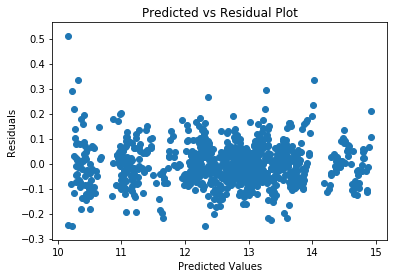

In [138]:
plt.scatter(np.log(model.fittedvalues), model.resid_pearson)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs Residual Plot')
plt.show()

Which we see is the case above.

We can check the independence assumption by plotting row number versus residuals

In [139]:
len(model.resid_pearson)

908

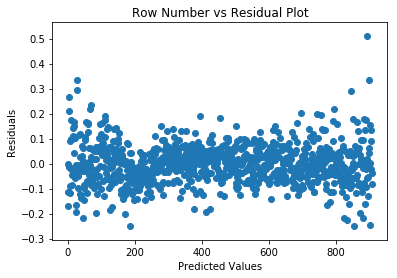

In [140]:
plt.scatter(np.arange(908), model.resid_pearson)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Row Number vs Residual Plot')
plt.show()

We see this assumption is satisfied.

We can check a correlation matrix to check for correlations between our predictors

In [141]:
df5.corr()

,Year,Gas_Per_Gallon,DEATHS_DIRECT,SPI,Population
Year,1.000000,0.889255,0.243404,0.010347,0.052535
Gas_Per_Gallon,0.889255,1.000000,0.254494,0.026557,0.029131
DEATHS_DIRECT,0.243404,0.254494,1.000000,-0.023925,0.266411
SPI,0.010347,0.026557,-0.023925,1.000000,-0.134993
Population,0.052535,0.029131,0.266411,-0.134993,1.000000


Gas_Per_Gallon is highly correlated with the Year. Also, I suspect that State will be correlated with the Population. These may not be a problem. We can check our VIFs

In [142]:
def find_vifs(df):
    vif = {predictor:variance_inflation_factor(df.values, index) for index, predictor in enumerate(list(df.columns))}
    return(vif)

In [143]:
df5 = df4[['State', 'Year', 'Gas_Per_Gallon', 'DEATHS_DIRECT', 'SPI', 'Population']]

The GLM model used Alabama as the reference variable, so we delete it here.

In [144]:
df6 = pd.get_dummies(df5['State'])
df6 = sm.add_constant(df6)
del df6['Alabama']
del df5['State']

In [145]:
df7 = pd.concat([df6, df5], axis=1)

We need to drop null values to find the VIFs

In [146]:
find_vifs(df7.dropna())

C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


{'Alaska': nan,
 'Arizona': 2.1249248102229084,
 'Arkansas': 2.2209729700845458,
 'California': 78.447084759774697,
 'Colorado': 2.0082197579129559,
 'Connecticut': 1.6315259667821822,
 'DEATHS_DIRECT': 1.3849218156161776,
 'Delaware': 2.9932414261024562,
 'Florida': 15.706767183351113,
 'Gas_Per_Gallon': 5.1994229083091437,
 'Georgia': 3.5260288877942449,
 'Hawaii': nan,
 'Idaho': 2.3789635266452787,
 'Illinois': 7.0701563937292127,
 'Indiana': 2.203077177922045,
 'Iowa': 2.1944872363962493,
 'Kansas': 2.2528388084317763,
 'Kentucky': 2.0130834279128509,
 'Louisiana': 1.81919620941951,
 'Maine': 2.2314796425369909,
 'Maryland': 2.117951002091282,
 'Massachusetts': 1.7705830423126276,
 'Michigan': 4.3542505993022917,
 'Minnesota': 2.0505196630778242,
 'Mississippi': 1.9303518589257418,
 'Missouri': 2.072337457679319,
 'Montana': 3.0223416882921503,
 'Nebraska': 2.6081629652676979,
 'Nevada': 1.9901457968213701,
 'New Hampshire': 2.2298764977196512,
 'New Jersey': 3.3298106033053032,
 '

The VIF for population is very high. Since it is likely correlated with the State, we should remove one of them. We can check which of the two has better fit.

In [147]:
smf.glm(formula = "total_crimes ~ Population", data=df4.dropna(), family=sm.families.NegativeBinomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      906
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                  0.258497686584
Method:                          IRLS   Log-Likelihood:                -12515.
Date:                Sun, 27 May 2018   Deviance:                       335.05
Time:                        18:37:53   Pearson chi2:                     234.
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9384      0.023    511.034      0.000      11.893      11.984
Population  1.307e-07    2.5e-09     52.266      0.000    1.26e-07    1.36e-07
==============================================================================
"""

In [148]:
smf.glm(formula = "total_crimes ~ State", data=df4.dropna(), family=sm.families.NegativeBinomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      860
Model Family:        NegativeBinomial   Df Model:                           47
Link Function:                    log   Scale:                 0.0166234155532
Method:                          IRLS   Log-Likelihood:                -12354.
Date:                Sun, 27 May 2018   Deviance:                       14.088
Time:                        18:37:53   Pearson chi2:                     14.3
No. Iterations:                     7                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.8810      0.028    457.822      0.000      12.826      12.936
State[T.Arizona]            0.4130      0.040     10.379      0.000       0.335       0.491
State[T.Arkansas]          -0.5085      0.040    -12.781      0.000      -0.587      -0.431
State[T.California]         1.9167      0.040     48.171      0.000       1.839       1.995
State[T.Colorado]          -0.1213      0.040     -3.048      0.002      -0.199      -0.043
State[T.Connecticut]       -0.7391      0.048    -15.402      0.000      -0.833      -0.645
State[T.Delaware]          -1.7229      0.040    -42.770      0.000      -1.802      -1.644
State[T.Florida]            1.4871      0.040     37.374      0.000       1.409       1.565
State[T.Georgia]            0.7226      0.040     18.162      0.000       0.645       0.801
State[T.Idaho]             -1.6154      0.043    -37.757      0.000      -1.699      -1.532
State[T.Illinois]           0.8777      0.040     22.059      0.000       0.800       0.956
State[T.Indiana]            0.1660      0.040      4.121      0.000       0.087       0.245
State[T.Iowa]              -0.7764      0.040    -19.512      0.000      -0.854      -0.698
State[T.Kansas]            -0.5647      0.040    -14.193      0.000      -0.643      -0.487
State[T.Kentucky]          -0.4969      0.040    -12.487      0.000      -0.575      -0.419
State[T.Louisiana]          0.1144      0.042      2.720      0.007       0.032       0.197
State[T.Maine]             -1.7700      0.046    -38.901      0.000      -1.859      -1.681
State[T.Maryland]           0.1891      0.040      4.753      0.000       0.111       0.267
State[T.Massachusetts]     -0.0608      0.047     -1.304      0.192      -0.152       0.031
State[T.Michigan]           0.6315      0.040     15.870      0.000       0.553       0.709
State[T.Minnesota]         -0.1487      0.040     -3.736      0.000      -0.227      -0.071
State[T.Mississippi]       -0.6375      0.043    -14.900      0.000      -0.721      -0.554
State[T.Missouri]           0.2259      0.040      5.679      0.000       0.148       0.304
State[T.Montana]           -1.8098      0.040    -45.483      0.000      -1.888      -1.732
State[T.Nebraska]          -1.1253      0.040    -28.281      0.000      -1.203      -1.047
State[T.Nevada]            -0.6740      0.044    -15.464      0.000      -0.759      -0.589
State[T.New Hampshire]     -1.8719      0.046    -41.140      0.000      -1.961      -1.783
State[T.New Jersey]         0.2333      0.040      5.863      0.000       0.155       0.311
State[T.New Mexico]        -0.7358      0.041    -18.024      0.000      -0.816      -0.656
State[T.New York]           0.9997      0.040     25.125      0.000       0.922       1.078
State[T.North Carolina]     0.6711      0.040     16.659      0.000       0.592       0.750
State[T.North Dakota]      -2.5230

Deviance is lower for the State predictor, so we should take out Population from the model.

Our current model is:

In [149]:
model = smf.glm('total_crimes ~ State + DEATHS_DIRECT + Gas_Per_Gallon + SPI + Year', df4.dropna(), family = sm.families.NegativeBinomial()).fit()

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      856
Model Family:        NegativeBinomial   Df Model:                           51
Link Function:                    log   Scale:                0.00689847288839
Method:                          IRLS   Log-Likelihood:                -12350.
Date:                Sun, 27 May 2018   Deviance:                       5.8452
Time:                        18:37:53   Pearson chi2:                     5.91
No. Iterations:                     7                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  54.0281      1.986     27.198      0.000      50.135      57.922
State[T.Arizona]            0.4049      0.026     15.594      0.000       0.354       0.456
State[T.Arkansas]          -0.5018      0.026    -19.447      0.000      -0.552      -0.451
State[T.California]         1.9008      0.026     73.579      0.000       1.850       1.951
State[T.Colorado]          -0.1267      0.026     -4.876      0.000      -0.178      -0.076
State[T.Connecticut]       -0.7011      0.032    -22.187      0.000      -0.763      -0.639
State[T.Delaware]          -1.7180      0.026    -65.028      0.000      -1.770      -1.666
State[T.Florida]            1.4793      0.031     48.013      0.000       1.419       1.540
State[T.Georgia]            0.7282      0.026     28.126      0.000       0.677       0.779
State[T.Idaho]             -1.6081      0.028    -57.317      0.000      -1.663      -1.553
State[T.Illinois]           0.8595      0.026     33.441      0.000       0.809       0.910
State[T.Indiana]            0.1690      0.026      6.424      0.000       0.117       0.221
State[T.Iowa]              -0.7834      0.026    -30.081      0.000      -0.834      -0.732
State[T.Kansas]            -0.5690      0.026    -21.843      0.000      -0.620      -0.518
State[T.Kentucky]          -0.4959      0.026    -19.096      0.000      -0.547      -0.445
State[T.Louisiana]          0.1150      0.027      4.192      0.000       0.061       0.169
State[T.Maine]             -1.7319      0.030    -57.545      0.000      -1.791      -1.673
State[T.Maryland]           0.1741      0.026      6.671      0.000       0.123       0.225
State[T.Massachusetts]     -0.0331      0.031     -1.080      0.280      -0.093       0.027
State[T.Michigan]           0.6172      0.026     23.732      0.000       0.566       0.668
State[T.Minnesota]         -0.1584      0.026     -6.080      0.000      -0.210      -0.107
State[T.Mississippi]       -0.6255      0.028    -22.528      0.000      -0.680      -0.571
State[T.Missouri]           0.2235      0.026      8.713      0.000       0.173       0.274
State[T.Montana]           -1.8205      0.026    -69.732      0.000      -1.872      -1.769
State[T.Nebraska]          -1.1344      0.026    -43.488      0.000      -1.186      -1.083
State[T.Nevada]            -0.6531      0.028    -23.065      0.000      -0.709      -0.598
State[T.New Hampshire]     -1.8228      0.030    -60.693      0.000      -1.882      -1.764
State[T.New Jersey]         0.2186      0.026      8.429      0.000       0.168       0.269
State[T.New Mexico]        -0.7320      0.027    -27.379      0.000      -0.784      -0.680
State[T.New York]           0.9812      0.026     37.960      0.000       0.930       1.032
State[T.North Carolina]     0.6689      0.026     25.539      0.000       0.618       0.720
State[T.North Dakota]      -2.5198

DEATHS_DIRECT and SPI are not significant at the 0.05 level and they don't appear to be practically significant. We can try to remove them using aic as the criteria

Try removing DEATHS_DIRECT:

In [151]:
model.aic - smf.glm('total_crimes ~ State + Gas_Per_Gallon + SPI + Year', df4.dropna(), family = sm.families.NegativeBinomial()).fit().aic

1.9980302865697013

This shows a model without DEATHS_DIRECT results in a lower aic, so we remove it.

Try removing SPI:

In [152]:
smf.glm('total_crimes ~ State + Gas_Per_Gallon + SPI + Year', df4.dropna(), family = sm.families.NegativeBinomial()).fit().aic \
- smf.glm('total_crimes ~ State + Gas_Per_Gallon + Year', df4.dropna(), family = sm.families.NegativeBinomial()).fit().aic

1.9999955129933369

This shows a model without SPI results in a lower aic, so we remove it

Our final model is:

In [153]:
smf.glm('total_crimes ~ State + Gas_Per_Gallon + Year', df4.dropna(), family = sm.families.NegativeBinomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           total_crimes   No. Observations:                  908
Model:                            GLM   Df Residuals:                      858
Model Family:        NegativeBinomial   Df Model:                           49
Link Function:                    log   Scale:                0.00688429977595
Method:                          IRLS   Log-Likelihood:                -12350.
Date:                Sun, 27 May 2018   Deviance:                       5.8472
Time:                        18:37:53   Pearson chi2:                     5.91
No. Iterations:                     7                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  54.0225      1.980     27.291      0.000      50.143      57.902
State[T.Arizona]            0.4028      0.026     15.720      0.000       0.353       0.453
State[T.Arkansas]          -0.5033      0.026    -19.657      0.000      -0.554      -0.453
State[T.California]         1.8994      0.026     73.978      0.000       1.849       1.950
State[T.Colorado]          -0.1289      0.026     -5.030      0.000      -0.179      -0.079
State[T.Connecticut]       -0.7041      0.031    -22.675      0.000      -0.765      -0.643
State[T.Delaware]          -1.7206      0.026    -66.338      0.000      -1.771      -1.670
State[T.Florida]            1.4783      0.026     57.735      0.000       1.428       1.529
State[T.Georgia]            0.7263      0.026     28.354      0.000       0.676       0.776
State[T.Idaho]             -1.6107      0.028    -58.380      0.000      -1.665      -1.557
State[T.Illinois]           0.8586      0.026     33.520      0.000       0.808       0.909
State[T.Indiana]            0.1669      0.026      6.437      0.000       0.116       0.218
State[T.Iowa]              -0.7858      0.026    -30.687      0.000      -0.836      -0.736
State[T.Kansas]            -0.5715      0.026    -22.317      0.000      -0.622      -0.521
State[T.Kentucky]          -0.4981      0.026    -19.447      0.000      -0.548      -0.448
State[T.Louisiana]          0.1128      0.027      4.164      0.000       0.060       0.166
State[T.Maine]             -1.7349      0.029    -58.986      0.000      -1.793      -1.677
State[T.Maryland]           0.1716      0.026      6.696      0.000       0.121       0.222
State[T.Massachusetts]     -0.0359      0.030     -1.192      0.233      -0.095       0.023
State[T.Michigan]           0.6149      0.026     24.014      0.000       0.565       0.665
State[T.Minnesota]         -0.1608      0.026     -6.277      0.000      -0.211      -0.111
State[T.Mississippi]       -0.6272      0.028    -22.771      0.000      -0.681      -0.573
State[T.Missouri]           0.2231      0.026      8.712      0.000       0.173       0.273
State[T.Montana]           -1.8230      0.026    -71.104      0.000      -1.873      -1.773
State[T.Nebraska]          -1.1370      0.026    -44.387      0.000      -1.187      -1.087
State[T.Nevada]            -0.6546      0.028    -23.277      0.000      -0.710      -0.599
State[T.New Hampshire]     -1.8258      0.029    -62.164      0.000      -1.883      -1.768
State[T.New Jersey]         0.2165      0.026      8.454      0.000       0.166       0.267
State[T.New Mexico]        -0.7345      0.026    -27.941      0.000      -0.786      -0.683
State[T.New York]           0.9796      0.026     38.227      0.000       0.929       1.030
State[T.North Carolina]     0.6670      0.026     25.719      0.000       0.616       0.718
State[T.North Dakota]      -2.5226